Accuracy:- 1.0
Testing [1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1
 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1
 0 1]
Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        35

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76

Model and vectorizer saved successfully.

 classification Result:-



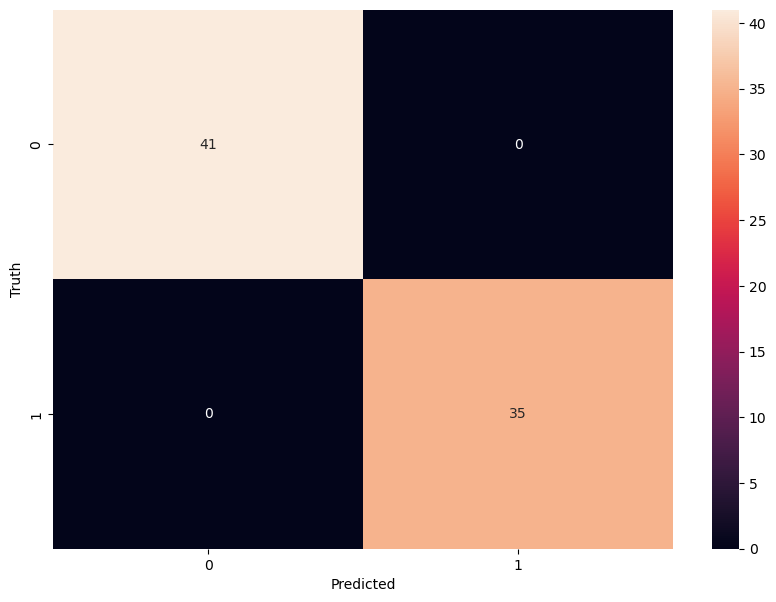

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib
from flask import Flask, request, jsonify




def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['entry'], df['label']

# Train model
def train_model(X, y):
    vectorizer = TfidfVectorizer()
    X_vectorized = vectorizer.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=40)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    print("Accuracy:-",model.score(X_test,y_test))
    #print(X_test)
    print("Testing",model.predict(X_test))
    
    
    d=model.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,d)
    
    %matplotlib inline
    import matplotlib.pyplot as plt
    import seaborn as sn
    plt.figure(figsize=(10,7))
    sn.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    
    
   
    print("Model Evaluation:")
    print(classification_report(y_test, model.predict(X_test)))
    
    return model, vectorizer

# Main function to train and save the model
def main():
    X, y = load_data('log_entries.csv')
    model, vectorizer = train_model(X, y)
    
    # Save the model and vectorizer
    joblib.dump(model, 'sql_injection_model.joblib')
    joblib.dump(vectorizer, 'vectorizer.joblib')
    print("Model and vectorizer saved successfully.")
    print("\n classification Result:-\n")

if __name__ == "__main__":
    main()










In [ ]:
import joblib
model=joblib.load('sql_injection_model.joblib')
vectorizer = joblib.load('vectorizer.joblib')
input_data = ["456 Elm Street, Los Angeles, CA"]#This is normal user data Information 
input_vector = vectorizer.transform(input_data)
model.predict(input_vector)#Machine learning Model classifying as normaldata

In [3]:
 '0'

array([0], dtype=int64)

In [4]:
additional_sql_injection_entry =['\' OR (SELECT CASE WHEN (1=1) THEN 1 ELSE 0 END) --"}']#This is sql injection statement
input_vector = vectorizer.transform(additional_sql_injection_entry)
model.predict(input_vector)#Machine learning Model classifying as malicious '1'

array([1], dtype=int64)

In [5]:
additional_sql_injection_entry =["OR 1=1"]

input_vector = vectorizer.transform(additional_sql_injection_entry)
model.predict(input_vector)

array([1], dtype=int64)